In [1]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
dataset=pd.read_csv('dataset4.csv')

In [2]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
###THIS SECTION IS DATASET SPECIFIC PROCESSING
drop_columns=['RowNumber','CustomerId','Surname']
dataset.drop(drop_columns, axis=1, inplace=True)

###THIS SECTION IS DATASET SPECIFIC PROCESSING


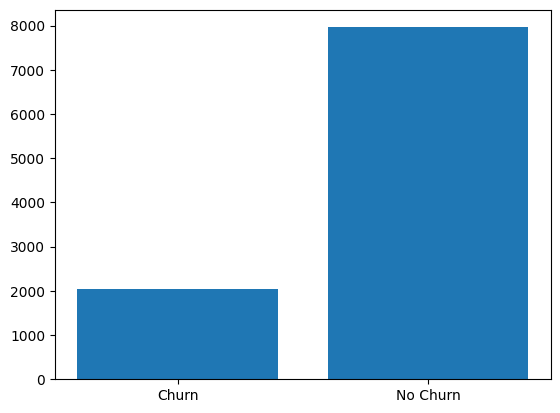

In [4]:
from pre_processor import PreProcessor


label_column = 'Exited'
pre_processor = PreProcessor(dataset)
pre_processor.rename_label(label_column).split_features_labels().plot_imbalance()
   

In [5]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
dataset.describe()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
binary_encode_columns=[]
one_hot_encode_columns=['Geography','Gender']
ordinal_encode_columns=[]
scaling_columns=['CreditScore','Age','Tenure','Balance','EstimatedSalary']


In [8]:
scaling_columns

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

In [9]:

pre_processor.\
    remove_nans().\
    remove_duplicates().\
    scale(scaling_columns).\
    binary_encode(binary_encode_columns).\
    onehot_encode(one_hot_encode_columns).\
    ordinal_encode(ordinal_encode_columns).\
    oversample()
    

In [10]:
pre_processor.dataset

,CreditScore,Geography_1,Geography_2,Geography_3,Gender_1,Gender_2,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,-0.326221,1,0,0,1,0,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1.0
1,-0.440036,0,1,0,1,0,0.198164,-1.387538,0.117350,1,0,1,0.216534,0.0
2,-1.536794,1,0,0,1,0,0.293517,1.032908,1.333053,3,1,0,0.240687,1.0
3,0.501521,1,0,0,1,0,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0.0
4,2.063884,0,1,0,1,0,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,-1.164310,0,1,0,1,0,0.960993,1.378686,1.040931,1,0,0,1.281378,1.0
15922,-1.485060,0,0,1,0,1,-0.278604,1.378686,0.668786,3,1,0,0.330735,1.0
15923,0.594642,1,0,0,0,1,-0.469311,-0.695982,-1.225848,1,0,1,0.371562,1.0
15924,1.701747,1,0,0,0,1,0.579578,0.687130,-1.225848,1,0,1,-0.820848,1.0


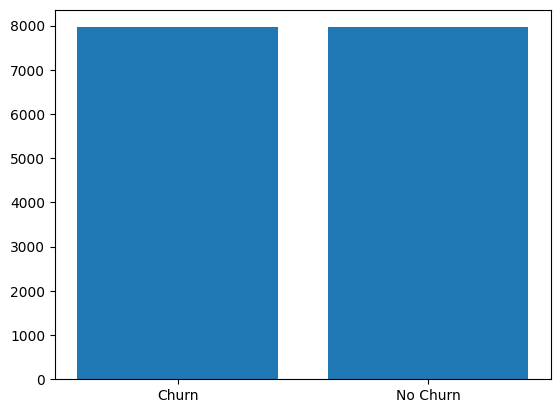

In [11]:
pre_processor.plot_imbalance()

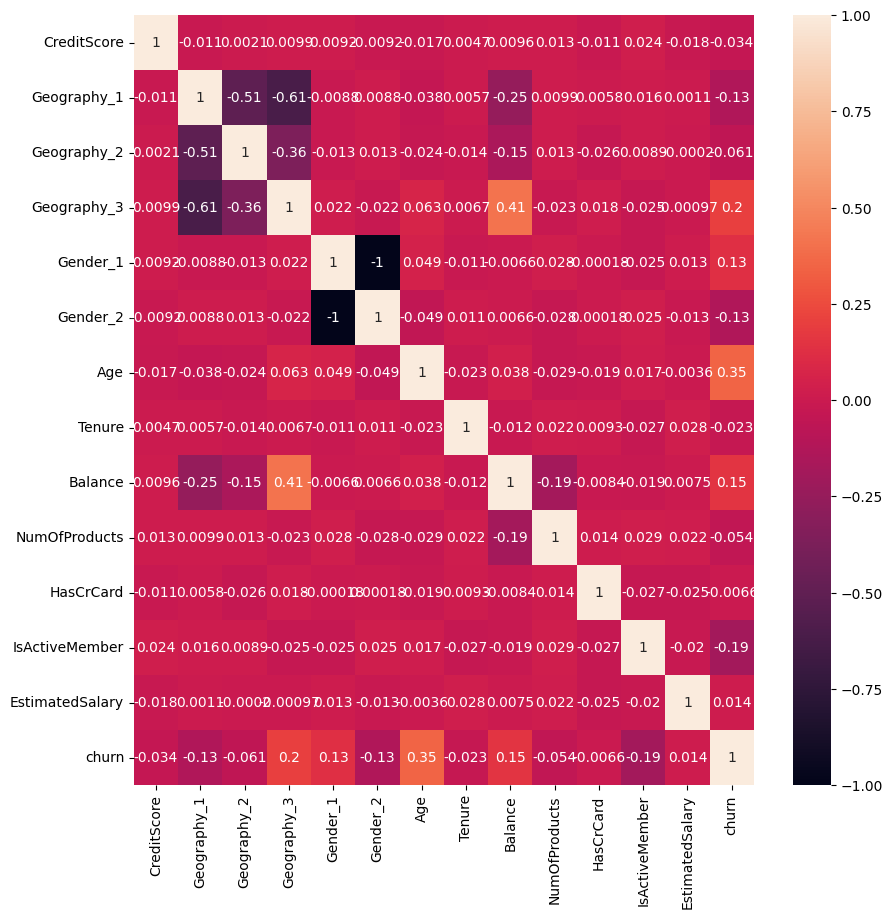

In [12]:
pre_processor.plot_correlation()

In [13]:
pre_processor.calculate_feature_importance()

,importance
Age,0.256625
Balance,0.140945
EstimatedSalary,0.140051
CreditScore,0.135211
NumOfProducts,0.124832
Tenure,0.085495
IsActiveMember,0.037250
Geography_3,0.021664
HasCrCard,0.017552
Geography_1,0.011668


In [14]:
pre_processor.remove_features_by_importance(0.00)

In [15]:
pre_processor.split_features_labels()

In [16]:
pre_processor.calculate_feature_importance()

,importance
Age,0.257109
Balance,0.141650
EstimatedSalary,0.139365
CreditScore,0.136391
NumOfProducts,0.124034
Tenure,0.083144
IsActiveMember,0.038055
Geography_3,0.022016
HasCrCard,0.017393
Geography_1,0.011580


In [17]:
X_train,X_test,y_train,y_test = pre_processor.train_test_split()

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


In [19]:
from train_setup import Model_selection

model_select=Model_selection()

model_select.train(X_train,y_train,X_test,y_test,n_trials_=2)

[I 2024-06-11 11:18:20,497] A new study created in memory with name: no-name-f9c4466f-dcff-4e9f-9071-091cac11f4df
[I 2024-06-11 11:18:23,864] Trial 0 finished with value: 0.7618524332810047 and parameters: {'n_estimators': 46, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 16}. Best is trial 0 with value: 0.7618524332810047.
[I 2024-06-11 11:18:32,665] Trial 1 finished with value: 0.7481946624803768 and parameters: {'n_estimators': 137, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.7618524332810047.
[I 2024-06-11 11:18:32,665] A new study created in memory with name: no-name-bc2b2ca1-fca7-478b-b255-109d354b4533
[I 2024-06-11 11:18:34,469] Trial 0 finished with value: 0.7006279434850864 and parameters: {'num_layers': 1, 'layer1_size': 39, 'layer2_size': 60, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.032803544070839255}. Best is trial 0 with value: 0.7006279434850864.
[I 2024-06-11 11:18:41,506] Trial 1 finished with 

In [20]:
model_select.classification_reports()

Random Forest
              precision    recall  f1-score   support

         0.0       0.79      0.76      0.77      1604
         1.0       0.76      0.80      0.78      1582

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186

Neural Network
              precision    recall  f1-score   support

         0.0       0.71      0.70      0.71      1604
         1.0       0.70      0.71      0.70      1582

    accuracy                           0.71      3186
   macro avg       0.71      0.71      0.71      3186
weighted avg       0.71      0.71      0.71      3186

Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.98      0.86      0.91      1604
         1.0       0.87      0.98      0.92      1582

    accuracy                           0.92      3186
   macro avg       0.93      0.92      0.92      3186
weighted avg       0.93    

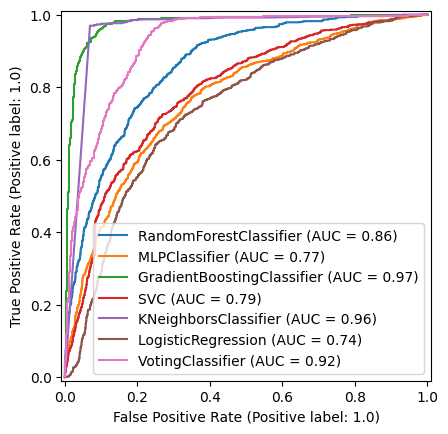

In [21]:
model_select.roc_curve()

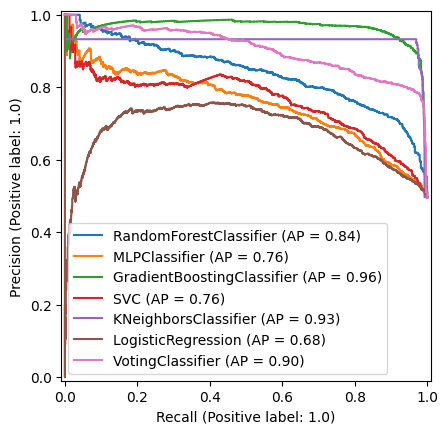

In [22]:
model_select.precision_recall_curve()